# AI Applications - Mini Project 2
> By Oliver Dietsche & Simon Peier

## Imports

In [49]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image

## Dataset
We decided to use part of the [Tiny ImageNet](https://www.kaggle.com/c/tiny-imagenet) dataset. 

According to the description in Kaggle, the Tiny ImageNet dataset has the following properties: "Tiny ImageNet contains 200 classes for training. Each class has 500 images. The test set contains 10,000 images. All images are 64x64 colored ones." It fulfills all the required key characteristics, except that it has too many classes (and thus too many samples). To meet all criteria, we pre-processed the data-set and chose 6 classes to use. As the dataset contains lots of classes of different categories, we settled for classes from the animal realm.

### Dataset import

In [70]:
data_dir = "dataset"
words_file = os.path.join(data_dir, "words.txt")
image_size = (64, 64)

# Load words.txt
with open(words_file, 'r') as f:
    class_labels = {}
    for line in f:
        line = line.strip().split('\t')
        class_labels[line[0]] = line[1]

# Load images and labels
images = []
labels = []

for folder_name in os.listdir(data_dir):
    if folder_name.startswith('n'):
        label = class_labels[folder_name]
        image_folder_path = os.path.join(data_dir, folder_name, "images")
        for image_name in os.listdir(image_folder_path):
            image_path = os.path.join(image_folder_path, image_name)
            image = img_to_array(load_img(image_path))
            images.append(image)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

### Normalization

In [75]:
print(f"Range of pixel values: [{images.min()};{images.max()}]")

images = images / 255.0

print(f"Range of pixel values: [{images.min()};{images.max()}]")

Range of pixel values: [0.0;255.0]
Range of pixel values: [0.0;1.0]


### Dataset split

In [76]:
# split into test and training data
train_val_imgs, test_imgs, train_val_labels, test_labels = train_test_split(images, labels, test_size=0.3)

In [77]:
# split into training and validation data
train_imgs, val_imgs, train_labels, val_labels = train_test_split(train_val_imgs, train_val_labels, test_size=0.2)

### Visualization

Number of samples: 3000
Image height: 64
Image width: 64
Number of channels: 3


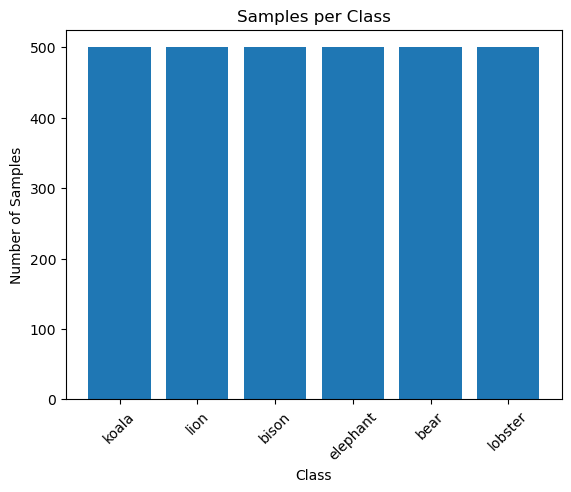

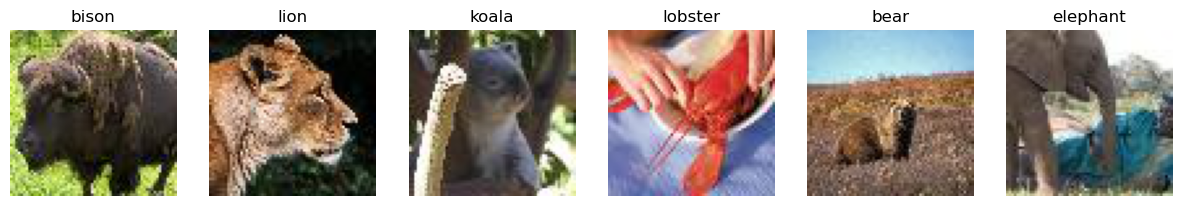

In [100]:
# Collect and print image stats
(train_samples, image_height, image_width, num_channels) = images.shape
print(f"Number of samples: {train_samples}")
print(f"Image height: {image_height}")
print(f"Image width: {image_width}")
print(f"Number of channels: {num_channels}")

# Count samples per class
samples_per_class = {}
for label in labels:
    samples_per_class[label] = samples_per_class.get(label, 0) + 1

# Determine if dataset is balanced
class_labels = list(samples_per_class.keys())
class_counts = list(samples_per_class.values())
plt.bar(class_labels, class_counts)
plt.title('Samples per Class')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

# Plot sample image for every class
num_samples_to_plot = 6
classes_to_plot = np.random.choice(list(samples_per_class.keys()), num_samples_to_plot, replace=False)

fig, axs = plt.subplots(1, num_samples_to_plot, figsize=(15, 3))

for i, class_label in enumerate(classes_to_plot):
    class_indices = np.where(labels == class_label)[0]
    sample_index = np.random.choice(class_indices)
    sample_image = images[sample_index]
    axs[i].imshow(sample_image)
    axs[i].set_title(class_label)
    axs[i].axis('off')

plt.show()